# Class 6 - Exercise : Webscraping a Zipf Law
by Guillaume CHAPELLE & Jean-Benoit EYMEOUD
![title](Cities.png)

#### La population est très concentrée dans les grandes villes
  * AUX US, 1.5% des terrains concentrent 42% des emplois.  
  * En Europe le taux d'urbanisation est passé de 12% in 1800 à  75% de nos jours
  
#### On va analyser la distribution  des villes
  * On se concentre sur la France et les US
      * https://en.wikipedia.org/wiki/List_of_communes_in_France_with_over_20,000_inhabitants
      * https://simple.wikipedia.org/wiki/List_of_United_States_cities_by_population

***

## Part 1. Scraper la population française
### Step 1 : Récupérer la table
   * Q1. On utilise les librairies suivantes: 

In [1]:
from bs4 import BeautifulSoup as bs
import urllib
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

   * Q2. Analyser la page web suivante
url_FR = https://en.wikipedia.org/wiki/List_of_communes_in_France_with_over_20,000_inhabitants

   * Q3. En utilisant __urllib__ et __bs__ extrarie le code HTML de la page
   * Q4. Trouver le tag associé à la table de données  
   * Q5. Extraire la première colonne de la table
   * Q6. Puis toutes les colonnes
    

### Step 2 : extraire les données
   * Q7. Nettoie la première colonne pour récupérer  le nom de la villeet sa population (attention à enlever les virgules pour obtenir un chiffre) 
   * Q8. stocker la dans un dictionnaire avec une entrée pour la population et une entree pour le nom
   * Q9. Faites une boucle pour créer un dictionnaire pour chaque ligne et le stocker dans une liste avec un dictinonaire par ligne
   
### Step 3 : crér la base
   * Q10.  utiliser pandas pour transformer votre liste de dictionnaire en DataFrame
   * Q11. Creer une variable qui calcule le rang de la ville (de 1 la plus grande à N la plus petite) 

### Step 4 : La loi de Zipf
   * Q12. Créer deux variables: log du range et log de la population
   * Q13. Représenter dans un nuage de point log(population) vs log(rang)
   * Q14. A l'aide de statsmodel et des MCO estimer la relation rang population  


## Part 2. Scraping US population in Wikipedia
  * Q15.Regarder la page suivante
url_US = https://simple.wikipedia.org/wiki/List_of_United_States_cities_by_population

  * Q16. Faire la même chose que pour la France
      * Astuce: La page peut être plus complete utiliser des  __try__ et __catch__ 
          * see:  https://docs.python.org/2/tutorial/errors.html


## Part 3. Comparer les deux pays
  * Q17. représenter les nuages de point log(pop) vs log(rang) sur un même graphique puour les deux pays (une couleur différente par pays) 
     



Part 1.

In [5]:
from bs4 import BeautifulSoup as bs
import urllib
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

#Q2
url = " https://en.wikipedia.org/wiki/List_of_communes_in_France_with_over_20,000_inhabitants " 

#Q3

response = urllib.request.urlopen(url)

soup = bs(response.read(), 'html.parser')

print(soup.prettify())


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of communes in France with over 20,000 inhabitants - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpre

In [8]:
#Q4

tb  = soup.find("table", class_= "wikitable sortable")
print(tb)

<table class="wikitable sortable">
<tbody><tr>
<th><a href="/wiki/Communes_of_France" title="Communes of France">Commune</a></th>
<th><a href="/wiki/Departments_of_France" title="Departments of France">Department</a></th>
<th><a href="/wiki/Regions_of_France" title="Regions of France">Region</a></th>
<th>Population, 2006</th>
<th>Population, 2013</th>
<th>Population, 2019</th>
<th>Rank, 2019
</th></tr>
<tr>
<td><a href="/wiki/Paris" title="Paris">Paris</a></td>
<td><a href="/wiki/Seine_(department)" title="Seine (department)">Paris</a></td>
<td><span data-sort-value="Ile-de-France !"><a href="/wiki/%C3%8Ele-de-France" title="Île-de-France">Île-de-France</a></span></td>
<td>2,181,371</td>
<td>2,229,621</td>
<td>2,165,423</td>
<td>1
</td></tr>
<tr>
<td><a href="/wiki/Marseille" title="Marseille">Marseille</a></td>
<td><a href="/wiki/Bouches-du-Rh%C3%B4ne" title="Bouches-du-Rhône">Bouches-du-Rhône</a></td>
<td><a href="/wiki/Provence-Alpes-C%C3%B4te_d%27Azur" title="Provence-Alpes-Côte d'

In [11]:
#Q5 

Première_colonne = [lg.td.get_text() for lg in tb.find_all('tr')[1:]]
print(Première_colonne)

['Paris', 'Marseille', 'Lyon', 'Toulouse', 'Nice', 'Nantes', 'Montpellier', 'Strasbourg', 'Bordeaux', 'Lille', 'Rennes', 'Reims', 'Toulon', 'Saint-Étienne', 'Le Havre', 'Grenoble', 'Dijon', 'Angers', 'Saint-Denis', 'Villeurbanne', 'Nîmes', 'Clermont-Ferrand', 'Aix-en-Provence', 'Le Mans', 'Brest', 'Tours', 'Amiens', 'Limoges', 'Annecy', 'Boulogne-Billancourt', 'Perpignan', 'Metz', 'Besançon', 'Orléans', 'Saint-Denis', 'Rouen', 'Montreuil', 'Argenteuil', 'Mulhouse', 'Caen', 'Nancy', 'Saint-Paul', 'Roubaix', 'Tourcoing', 'Nanterre', 'Vitry-sur-Seine', 'Créteil', 'Avignon', 'Poitiers', 'Aubervilliers', 'Asnières-sur-Seine', 'Aulnay-sous-Bois', 'Colombes', 'Dunkirk', 'Saint-Pierre', 'Versailles', 'Courbevoie', 'Le Tampon', 'Cherbourg-en-Cotentin', 'Rueil-Malmaison', 'Béziers', 'La Rochelle', 'Champigny-sur-Marne', 'Fort-de-France', 'Pau', 'Saint-Maur-des-Fossés', 'Cannes', 'Antibes', 'Calais', 'Drancy', 'Mérignac', 'Mamoudzou', 'Saint-Nazaire', 'Ajaccio', 'Colmar', 'Issy-les-Moulineaux', '

In [14]:
#Q6

table_total = [[ c.get_text(strip=True) for c in lg.find_all('td')] for lg in tb.find_all('tr')[1:]]
print(table_total)

[['Paris', 'Paris', 'Île-de-France', '2,181,371', '2,229,621', '2,165,423', '1'], ['Marseille', 'Bouches-du-Rhône', "Provence-Alpes-Côte d'Azur", '839,043', '855,393', '870,731', '2'], ['Lyon', 'Lyon Metropolis', 'Auvergne-Rhône-Alpes', '472,305', '500,715', '522,969', '3'], ['Toulouse', 'Haute-Garonne', 'Occitanie', '437,715', '458,298', '493,465', '4'], ['Nice', 'Alpes-Maritimes', "Provence-Alpes-Côte d'Azur", '347,060', '342,295', '342,669', '5'], ['Nantes', 'Loire-Atlantique', 'Pays de la Loire', '282,853', '292,718', '318,808', '6'], ['Montpellier', 'Hérault', 'Occitanie', '251,634', '272,084', '295,542', '7'], ['Strasbourg', 'Bas-Rhin', 'Grand Est', '272,975', '275,718', '287,228', '8'], ['Bordeaux', 'Gironde', 'Nouvelle-Aquitaine', '232,260', '243,626', '260,958', '9'], ['Lille', 'Nord', 'Hauts-de-France', '226,014', '231,491', '234,475', '10'], ['Rennes', 'Ille-et-Vilaine', 'Brittany', '209,613', '211,373', '220,488', '11'], ['Reims', 'Marne', 'Grand Est', '183,837', '182,592',

In [18]:
#Q7

nom = table_total[0][0]
population = table_total[0][5].replace(",", " ")

print(nom)
print(population)

Paris
2 165 423


In [22]:
#Q8


dict_ville={'Ville' : nom , 'Population' : population }

print(dict_ville)

{'Ville': 'Paris', 'Population': '2 165 423'}


In [26]:
#Q9

dict = []

for i in table_total:
     
        ville_dict = {}
        nom = i[0]
        population = pd.to_numeric(i[5].replace(',', ''), errors='coerce')
        ville_dict['nom'] = nom
        ville_dict['population']= population

        dict.append(ville_dict)
    

print(dict)

[{'nom': 'Paris', 'population': 2165423}, {'nom': 'Marseille', 'population': 870731}, {'nom': 'Lyon', 'population': 522969}, {'nom': 'Toulouse', 'population': 493465}, {'nom': 'Nice', 'population': 342669}, {'nom': 'Nantes', 'population': 318808}, {'nom': 'Montpellier', 'population': 295542}, {'nom': 'Strasbourg', 'population': 287228}, {'nom': 'Bordeaux', 'population': 260958}, {'nom': 'Lille', 'population': 234475}, {'nom': 'Rennes', 'population': 220488}, {'nom': 'Reims', 'population': 181194}, {'nom': 'Toulon', 'population': 178745}, {'nom': 'Saint-Étienne', 'population': 173821}, {'nom': 'Le Havre', 'population': 168290}, {'nom': 'Grenoble', 'population': 158198}, {'nom': 'Dijon', 'population': 158002}, {'nom': 'Angers', 'population': 155850}, {'nom': 'Saint-Denis', 'population': 153810}, {'nom': 'Villeurbanne', 'population': 152212}, {'nom': 'Nîmes', 'population': 148561}, {'nom': 'Clermont-Ferrand', 'population': 147865}, {'nom': 'Aix-en-Provence', 'population': 145133}, {'nom':

In [37]:
#Q10

df=pd.DataFrame(dict)

print(df)

                      nom  population
0                   Paris   2165423.0
1               Marseille    870731.0
2                    Lyon    522969.0
3                Toulouse    493465.0
4                    Nice    342669.0
..                    ...         ...
468               Lannion     20210.0
469      Morsang-sur-Orge     20124.0
470  L'Isle-sur-la-Sorgue     20557.0
471               Lisieux     20038.0
472                Sceaux     20004.0

[473 rows x 2 columns]


In [38]:
#Q11

df = df.sort_values(by="population", ascending=False).assign(Rang=range(1, len(df) + 1))
print(df.head())

         nom  population  Rang
0      Paris   2165423.0     1
1  Marseille    870731.0     2
2       Lyon    522969.0     3
3   Toulouse    493465.0     4
4       Nice    342669.0     5


In [39]:
#Q12



log_rang = np.log(df["Rang"]) 
log_population = np.log(df["population"])

print("Log Rang :" , log_rang)
print("Log Population :", log_population)

Log Rang : 0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
469    6.150603
471    6.152733
472    6.154858
71     6.156979
252    6.159095
Name: Rang, Length: 473, dtype: float64
Log Population : 0      14.588126
1      13.677088
2      13.167277
3      13.109207
4      12.744520
         ...    
469     9.909668
471     9.905386
472     9.903688
71           NaN
252          NaN
Name: population, Length: 473, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

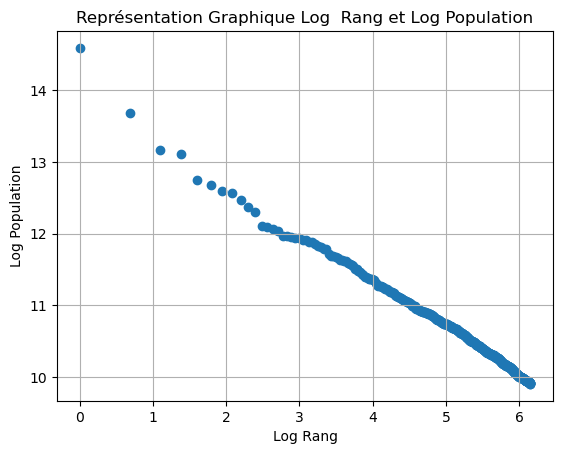

In [41]:
#Q13

import matplotlib.pyplot as plt

plt.scatter( log_rang, log_population)
plt.xlabel("Log Rang")
plt.ylabel("Log Population")
plt.title("Représentation Graphique Log  Rang et Log Population")
plt.grid(True)
plt.show

In [43]:
#Q14 

import statsmodels.formula.api as smf

formula='log_population ~ log_rang'
results = smf.ols(formula, data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         log_population   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 8.199e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:14:42   Log-Likelihood:                 761.20
No. Observations:                 471   AIC:                            -1518.
Df Residuals:                     469   BIC:                            -1510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9657      0.012   1166.105      0.0

In [47]:
#Q15

url_us ="https://simple.wikipedia.org/wiki/List_of_United_States_cities_by_population"


from bs4 import BeautifulSoup as bs
import urllib
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#Q16

response = urllib.request.urlopen(url_us)
soup = bs(response.read(), 'html.parser')
print(soup.prettify())







<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of United States cities by population - Simple English Wikipedia, the free encyclopedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featu

In [49]:
tb_us = soup.find("table", class_= "sortable wikitable sticky-header-multi static-row-numbers sort-under col1left col2center")
print(tb_us)



<table class="sortable wikitable sticky-header-multi static-row-numbers sort-under col1left col2center" style="text-align:right">
<tbody><tr>
<th rowspan="2">City
</th>
<th rowspan="2">State<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite-bracket">[</span>a<span class="cite-bracket">]</span></a></sup>
</th>
<th rowspan="2">2023<br/>estimate
</th>
<th rowspan="2">2020<br/>census
</th>
<th rowspan="2">Change
</th>
<th colspan="2">2020 land area
</th>
<th colspan="2">2020 density
</th>
<th rowspan="2">Location
</th></tr>
<tr>
<th>mi<sup>2</sup>
</th>
<th>km<sup>2</sup>
</th>
<th>/ mi<sup>2</sup>
</th>
<th>/ km<sup>2</sup>
</th></tr>
<tr>
<td style="background-color:#cfecec"><i><a href="/wiki/New_York_City" title="New York City">New York</a></i><sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</td>
<td><a href="/wiki/New_York_(state)" title="New York (state)">NY</a>

In [51]:
table_total_us = [[ c.get_text(strip=True) for c in lg.find_all('td')] for lg in tb_us.find_all('tr')[1:]]
print(table_total_us)

[[], ['New York[b]', 'NY', '8,258,035', '8,804,190', '−6.20%', '300.5', '778.3', '29,298', '11,312', '40°40′N73°56′W\ufeff / \ufeff40.66°N 73.94°W\ufeff /40.66; -73.94\ufeff (New York City)'], ['Los Angeles', 'CA', '3,820,914', '3,898,747', '−2.00%', '469.5', '1,216.0', '8,304', '3,206', '34°01′N118°25′W\ufeff / \ufeff34.02°N 118.41°W\ufeff /34.02; -118.41\ufeff (Los Angeles)'], ['Chicago', 'IL', '2,664,452', '2,746,388', '−2.98%', '227.7', '589.7', '12,061', '4,657', '41°50′N87°41′W\ufeff / \ufeff41.84°N 87.68°W\ufeff /41.84; -87.68\ufeff (Chicago)'], ['Houston', 'TX', '2,314,157', '2,304,580', '+0.42%', '640.4', '1,658.6', '3,599', '1,390', '29°47′N95°23′W\ufeff / \ufeff29.79°N 95.39°W\ufeff /29.79; -95.39\ufeff (Houston)'], ['Phoenix', 'AZ', '1,650,070', '1,608,139', '+2.61%', '518.0', '1,341.6', '3,105', '1,199', '33°34′N112°05′W\ufeff / \ufeff33.57°N 112.09°W\ufeff /33.57; -112.09\ufeff (Phoenix)'], ['Philadelphia[c]', 'PA', '1,550,542', '1,603,797', '−3.32%', '134.4', '348.1', '1

In [53]:
dict_us = []

for i in table_total_us:
     if len(i) > 1:
        ville_dict_us = {}
        nom_us = i[0]
        population_us = pd.to_numeric(i[2].replace(',', ''), errors='coerce')
        ville_dict_us['nom'] = nom_us
        ville_dict_us['population']= population_us

        dict_us.append(ville_dict_us)
    

print(dict_us)

[{'nom': 'New York[b]', 'population': 8258035}, {'nom': 'Los Angeles', 'population': 3820914}, {'nom': 'Chicago', 'population': 2664452}, {'nom': 'Houston', 'population': 2314157}, {'nom': 'Phoenix', 'population': 1650070}, {'nom': 'Philadelphia[c]', 'population': 1550542}, {'nom': 'San Antonio', 'population': 1495295}, {'nom': 'San Diego', 'population': 1388320}, {'nom': 'Dallas', 'population': 1302868}, {'nom': 'Jacksonville[d]', 'population': 985843}, {'nom': 'Austin', 'population': 979882}, {'nom': 'Fort Worth', 'population': 978468}, {'nom': 'San Jose', 'population': 969655}, {'nom': 'Columbus', 'population': 913175}, {'nom': 'Charlotte', 'population': 911311}, {'nom': 'Indianapolis[e]', 'population': 879293}, {'nom': 'San Francisco[f]', 'population': 808988}, {'nom': 'Seattle', 'population': 755078}, {'nom': 'Denver[g]', 'population': 716577}, {'nom': 'Oklahoma City', 'population': 702767}, {'nom': 'Nashville[h]', 'population': 687788}, {'nom': 'Washington[i]', 'population': 6789

In [55]:
df_us=pd.DataFrame(dict_us)
df_us = df_us.sort_values(by="population", ascending=False).assign(Rang=range(1, len(df_us) + 1))

print(df_us)

             nom  population  Rang
0    New York[b]     8258035     1
1    Los Angeles     3820914     2
2        Chicago     2664452     3
3        Houston     2314157     4
4        Phoenix     1650070     5
..           ...         ...   ...
331         Yuma      100858   332
332  New Bedford      100695   333
333   Suffolk[k]      100659   334
334     Hesperia      100633   335
335    Davenport      100354   336

[336 rows x 3 columns]


In [57]:
log_rang_us = np.log(df_us["Rang"]) 
log_population_us = np.log(df_us["population"])

print("Log Rang :" , log_rang_us)
print("Log Population :", log_population_us)

Log Rang : 0      0.000000
1      0.693147
2      1.098612
3      1.386294
4      1.609438
         ...   
331    5.805135
332    5.808142
333    5.811141
334    5.814131
335    5.817111
Name: Rang, Length: 336, dtype: float64
Log Population : 0      15.926697
1      15.156000
2      14.795509
3      14.654556
4      14.316328
         ...    
331    11.521469
332    11.519851
333    11.519494
334    11.519236
335    11.516459
Name: population, Length: 336, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

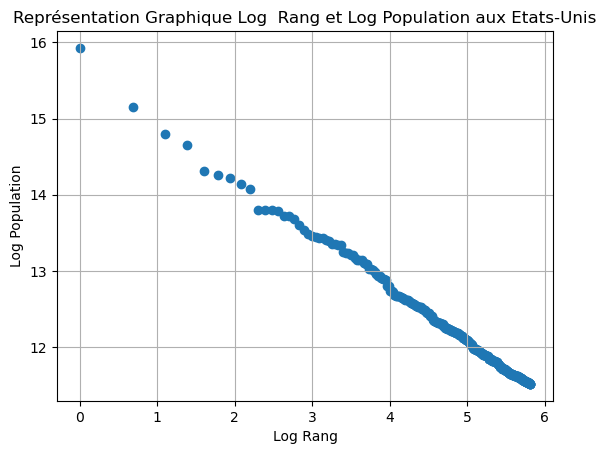

In [58]:
plt.scatter( log_rang_us, log_population_us)
plt.xlabel("Log Rang")
plt.ylabel("Log Population")
plt.title("Représentation Graphique Log  Rang et Log Population aux Etats-Unis")
plt.grid(True)
plt.show

In [59]:
import statsmodels.formula.api as smf

formula_us='log_population_us ~ log_rang_us'
results_us = smf.ols(formula_us, data=df_us).fit()
print(results_us.summary())

                            OLS Regression Results                            
Dep. Variable:      log_population_us   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.291e+05
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:15:32   Log-Likelihood:                 647.18
No. Observations:                 336   AIC:                            -1290.
Df Residuals:                     334   BIC:                            -1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.6567      0.010   1593.158      

<function matplotlib.pyplot.show(close=None, block=None)>

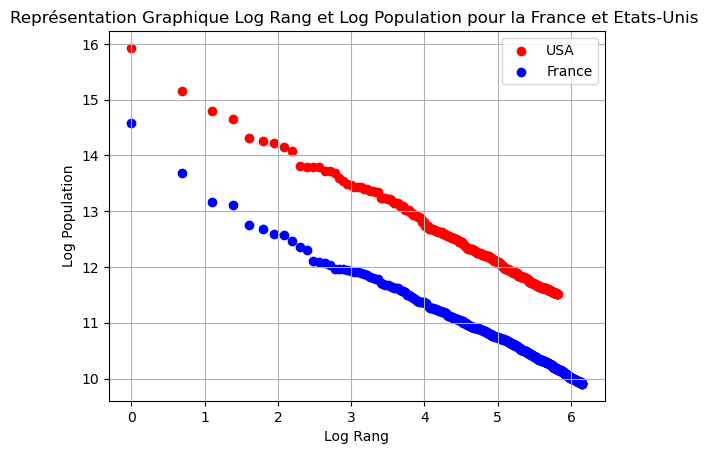

In [61]:
#Q17



plt.scatter( log_rang_us, log_population_us, color = 'red', label='USA')
plt.scatter( log_rang, log_population, color = 'blue', label='France')
plt.legend()
plt.xlabel("Log Rang")
plt.ylabel("Log Population")
plt.title("Représentation Graphique Log Rang et Log Population pour la France et les Etats-Unis ")
plt.grid(True)
plt.show
